# Using Random Forest with the Breast Cancer Dataset

### Step 1: Import Libraries and Load the Dataset

First, import the necessary libraries and load the Breast Cancer dataset.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows of the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Step 2: Split the Data

Split the dataset into training and testing sets.

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 455
Testing samples: 114


### Step 3: Train the Random Forest Model

Instantiate and train the Random Forest model.

In [16]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, 
                            max_features='sqrt',  # default for classification
                            max_depth=2, 
                            random_state=42)


# How to control feature selection:
# 1. max_features parameter
# This parameter determines how many features to consider at each split. You can set it to:

# "auto" or "sqrt" (recommended for classification): Uses the square root of total features.
# "log2": Uses base-2 logarithm of total features.
# A float between 0.0 and 1.0: represents the percentage of total features to consider.
# An integer: explicitly specify the number of features.

# Train the model on the training data
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=42)

### Step 4: Predict and Evaluate

Make predictions on the test set and evaluate the model.

Cross Validation Accuracies: [0.98245614 0.87719298 0.92982456 0.94736842 0.94736842 0.98245614
 0.9122807  0.98245614 0.94736842 0.98214286]
Corss Validation Average Accuracy: 0.9490914786967419
Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



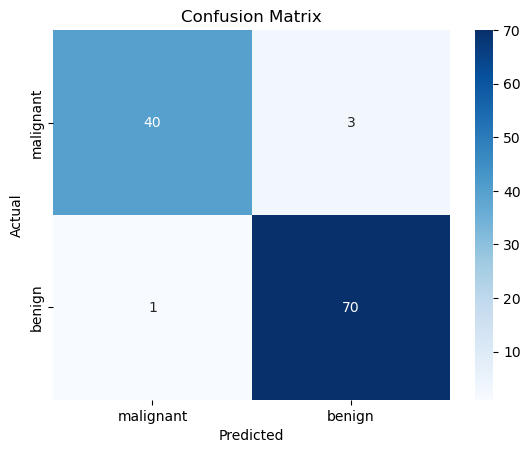

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=10)  # You probably want cv=10 not cv=100
print(f"Cross Validation Accuracies: {scores}")
print(f"Corss Validation Average Accuracy: {scores.mean()}")


# Predict the labels on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Step 5: Feature Importance
    
Investigate which features the model found most important.

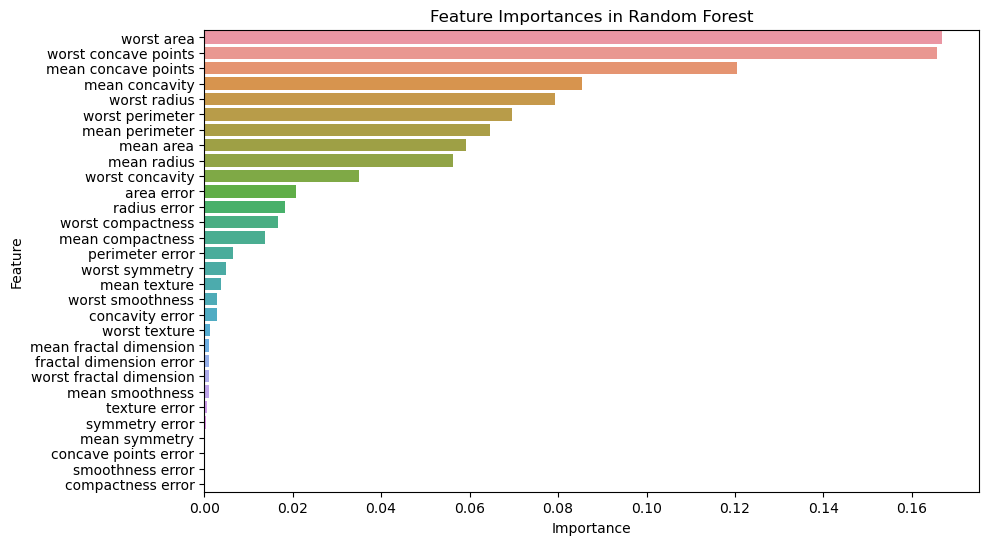

In [18]:
# Plot feature importances
feature_importances = rf.feature_importances_
features = data.feature_names

# Create a DataFrame for better visualization
fi_data = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_data)
plt.title('Feature Importances in Random Forest')
plt.show()


## Conclusion

**Accuracy and classification reports** give insight into the model's performance.

**Confusion matrices** help identify where the model is making mistakes.

**Feature importances** show which features most contributed to the model's predictions.

This step-by-step guide should help you understand and implement Random Forest with the Breast Cancer dataset. Feel free to experiment with different numbers of trees (n_estimators) and other parameters like max_depth to improve your model further. Let me know if you have any other questions or need further assistance!

### Tree Visualization

There are many trees and it is hard to show them all in one graph. The following code implements a visualization of one of the trees according to its index number,

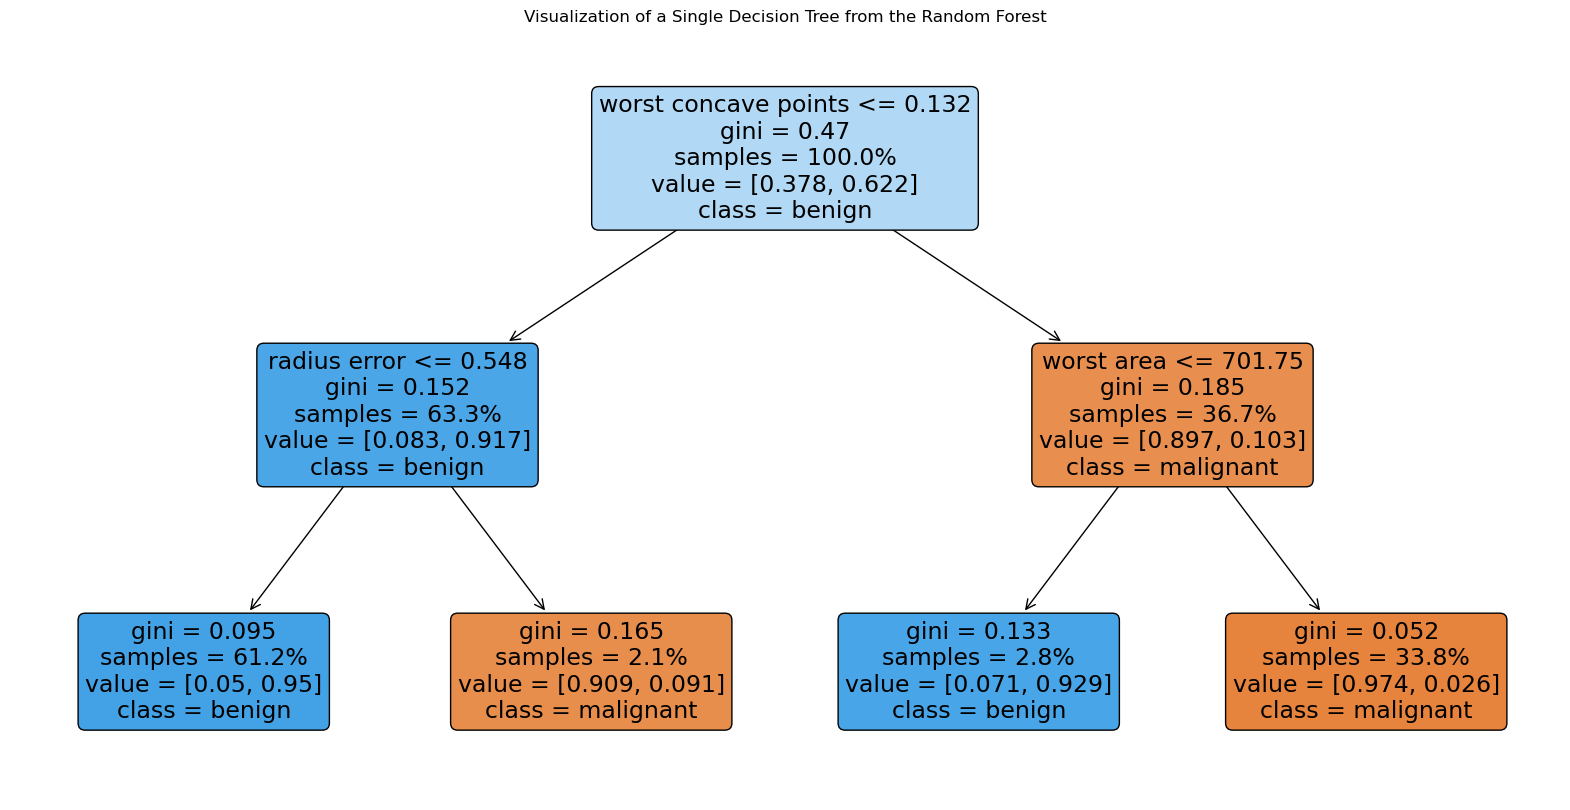

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'rf' is your trained RandomForestClassifier instance

# Extract a single tree from the Random Forest
estimator = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          rounded=True, 
          proportion=True)
plt.title('Visualization of a Single Decision Tree from the Random Forest')
plt.show()


    ### Explanation of Visualization Code

**estimator = rf.estimators_[0]:** Extracts the first decision tree from the random forest.

##### plot_tree: 
A utility from sklearn.tree to plot the tree structure.

**feature_names:** Labels for features.

**class_names:** Names for each target class.

**filled=True:** Adds colors to the plot nodes for better visibility.

**rounded=True:** Option to use rounded corners for nodes.

**proportion=True:** If True, proportion of samples captured by each node is shown.

This code plots one of the decision trees in your random forest, providing insight into its structure and how it makes decisions. Remember that a Random Forest consists of multiple such individual trees, each contributing to the ensemble model's final decision.

# Exercises

1- Try tuning hyperparameters of the models (number of estimators, max depth, etc.). How does this affect performance?

2- Investigate some of the trees and find out how they differ from each other.